<a href="https://colab.research.google.com/github/nhlong1512/IS403.N21/blob/main/Final/Final04052023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
path = 'BTC-USD.csv'

df = pd.read_csv(path)
df = df[['Date','Close']]

df.head()

,Date,Close
0,1/1/2019,3843.520020
1,1/2/2019,3943.409424
2,1/3/2019,3836.741211
3,1/4/2019,3857.717529
4,1/5/2019,3845.194580


In [4]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00


In [5]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
model = pm.auto_arima(df.Close, start_p=0, 
                      start_q=0,max_p=5, max_q=5, 
                      m=12,start_P=0, seasonal=False,
                      d=0, D=0, trace=True,error_action='ignore',
                      suppress_warnings=True, stepwise=True)

print(model.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36279.536, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=34218.160, Time=1.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26107.157, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26108.642, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26109.006, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26110.589, Time=1.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26107.301, Time=1.54 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 8.163 seconds
26107.156666437244


Vậy ARIMA(1,0,1) là phù hợp nhất


**<h3>Xây dựng mô hình ARIMA</h3>**

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(df.Close, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1551
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13049.426
Date:                Fri, 05 May 2023   AIC                          26106.853
Time:                        04:13:18   BIC                          26128.239
Sample:                             0   HQIC                         26114.807
                               - 1551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.349e+04   9727.840      2.415      0.016    4424.076    4.26e+04
ar.L1          0.9977      0.001    759.636      0.000       0.995       1.000
ma.L1         -0.0278      0.018     -1.534      0.1

**<h3>Dự báo</h3>**

**<h3>Dự đoán trên bộ dữ liệu với Train-Test là 7-3</h3>**

In [25]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf

# Chia dữ liệu train-test theo tỷ lệ 7-3
train, test = train_test_split(df, test_size=0.3, shuffle=False)

# Hiển thị kích thước của tập train và tập test
print(len(train))
print(len(test))
# train = df.Close[:len(train)]
# test = df.Close[len(train):]

1085
466


In [26]:
print(test.iloc[0],test.iloc[-1])

Close    48936.61328
Name: 2021-12-21 00:00:00, dtype: float64 Close    28478.48438
Name: 2023-03-31 00:00:00, dtype: float64


In [24]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10518.311
Date:                Fri, 05 May 2023   AIC                          21044.622
Time:                        04:16:26   BIC                          21065.114
Sample:                    01-01-2019   HQIC                         21052.329
                         - 05-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+04    1.2e+04      2.011      0.044     609.680    4.75e+04
ar.L1          0.9978      0.002    646.029      0.000       0.995       1.001
ma.L1         -0.0373      0.021     -1.762      0.078      -0.079       0.004
sigma2      1.363e+06    2.6e+04     52.491      0.000    1.31e+06    1.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2557.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              29.25   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
df.set_index('Date', inplace = True)
df.head()

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-12-21    46840.564394
2021-12-22    46809.536077
2021-12-23    46778.546053
2021-12-24    46747.594276
2021-12-25    46716.680698
2021-12-26    46685.805273
2021-12-27    46654.967953
2021-12-28    46624.168691
2021-12-29    46593.407440
2021-12-30    46562.684154
2021-12-31    46531.998785
2022-01-01    46501.351287
2022-01-02    46470.741612
2022-01-03    46440.169715
2022-01-04    46409.635549
Freq: D, Name: predicted_mean, dtype: float64
Mean Squared Error: 229937041.15856016


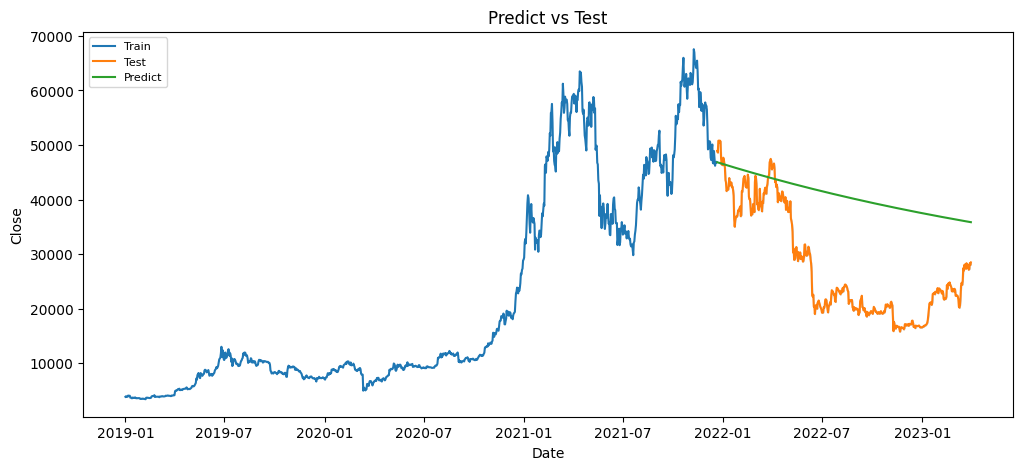

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data, test_data = train_test_split(df['Close'], test_size=0.3, shuffle=False)

# Train the ARIMA model
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()

# Forecast
print(fitted.forecast(15, alpha=0.05))  # 95% conf
fc = fitted.forecast(len(test_data))
conf = fitted.conf_int(alpha=0.05)

# Calculate mean squared error
mse = mean_squared_error(test_data, fc)
print('Mean Squared Error:', mse)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(df.Close, index=test_data.index)
upper_series = pd.Series(df.Close, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fc_series, label='Predict')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('Predict vs Test')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.Close)

<ipython-input-28-d5866cac8356>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-28-d5866cac8356>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-28-d5866cac8356>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-28-d5866cac8356>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.6291231605880453,
 'me': 13167.03636761129,
 'mae': 13398.44571919728,
 'mpe': 0.6243257494105823,
 'rmse': 15163.67505450312,
 'corr': 0.8261522435427171,
 'minmax': 0.33840804317158}

**<h3>Dự đoán trên bộ dữ liệu với Train-Test là 8-2</h3>**

In [29]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf

# Chia dữ liệu train-test theo tỷ lệ 8-2
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Hiển thị kích thước của tập train và tập test
print(len(train))
print(len(test))
# train = df.Close[:len(train)]
# test = df.Close[len(train):]

1240
311


In [30]:
print(test.iloc[0],test.iloc[-1])

Close    29562.36133
Name: 2022-05-25 00:00:00, dtype: float64 Close    28478.48438
Name: 2023-03-31 00:00:00, dtype: float64


In [31]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10518.311
Date:                Fri, 05 May 2023   AIC                          21044.622
Time:                        04:19:43   BIC                          21065.114
Sample:                    01-01-2019   HQIC                         21052.329
                         - 05-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+04    1.2e+04      2.011      0.044     609.680    4.75e+04
ar.L1          0.9978      0.002    646.029      0.000       0.995       1.001
ma.L1         -0.0373      0.021     -1.762      0.078      -0.079       0.004
sigma2      1.363e+06    2.6e+04     52.491      0.000    1.31e+06    1.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2557.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              29.25   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
df

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
...,...
2023-03-27,27139.888670
2023-03-28,27268.130860
2023-03-29,28348.441410


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-05-25    29623.826176
2022-05-26    29611.654532
2022-05-27    29599.509444
2022-05-28    29587.390854
2022-05-29    29575.298704
2022-05-30    29563.232937
2022-05-31    29551.193495
2022-06-01    29539.180321
2022-06-02    29527.193357
2022-06-03    29515.232546
2022-06-04    29503.297831
2022-06-05    29491.389155
2022-06-06    29479.506462
2022-06-07    29467.649694
2022-06-08    29455.818795
Freq: D, Name: predicted_mean, dtype: float64
Mean Squared Error: 58826133.41236973


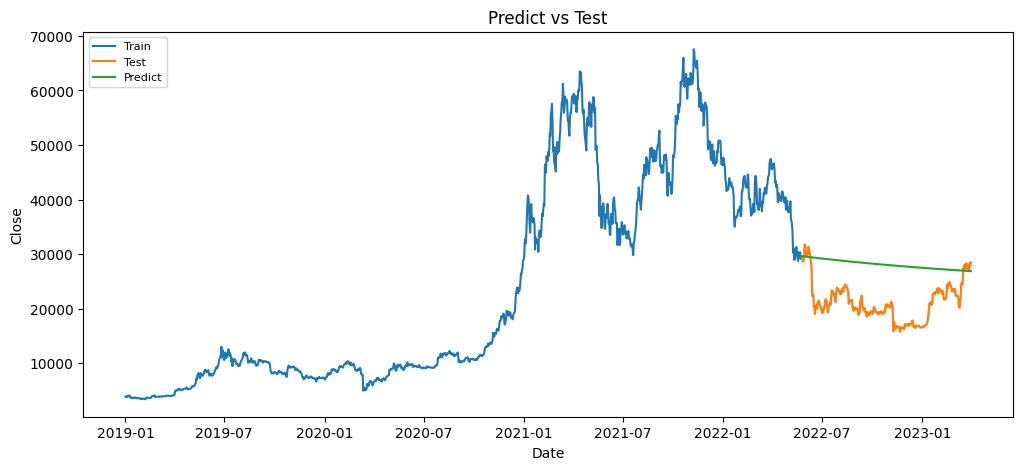

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data, test_data = train_test_split(df['Close'], test_size=0.2, shuffle=False)

# Train the ARIMA model
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()

# Forecast
print(fitted.forecast(15, alpha=0.05))  # 95% conf
fc = fitted.forecast(len(test_data))
conf = fitted.conf_int(alpha=0.05)

# Calculate mean squared error
mse = mean_squared_error(test_data, fc)
print('Mean Squared Error:', mse)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(df.Close, index=test_data.index)
upper_series = pd.Series(df.Close, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fc_series, label='Predict')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('Predict vs Test')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [34]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.Close)

<ipython-input-34-d5866cac8356>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-34-d5866cac8356>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-34-d5866cac8356>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-34-d5866cac8356>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.3595276096743347,
 'me': 6820.357141125019,
 'mae': 6974.420542199389,
 'mpe': 0.3542905078026383,
 'rmse': 7669.819646665085,
 'corr': 0.1773965763225625,
 'minmax': 0.24805498439383367}